<a href="https://colab.research.google.com/github/Valeriy1990/Data_science/blob/main/%D0%9E%D1%82%D0%B7%D1%8B%D0%B2%D1%8B_%D0%BA_%D1%84%D0%B8%D0%BB%D1%8C%D0%BC%D0%B0%D0%BC_(%D0%B8%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D1%83%D0%B5%D0%BC_%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82_IMDB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

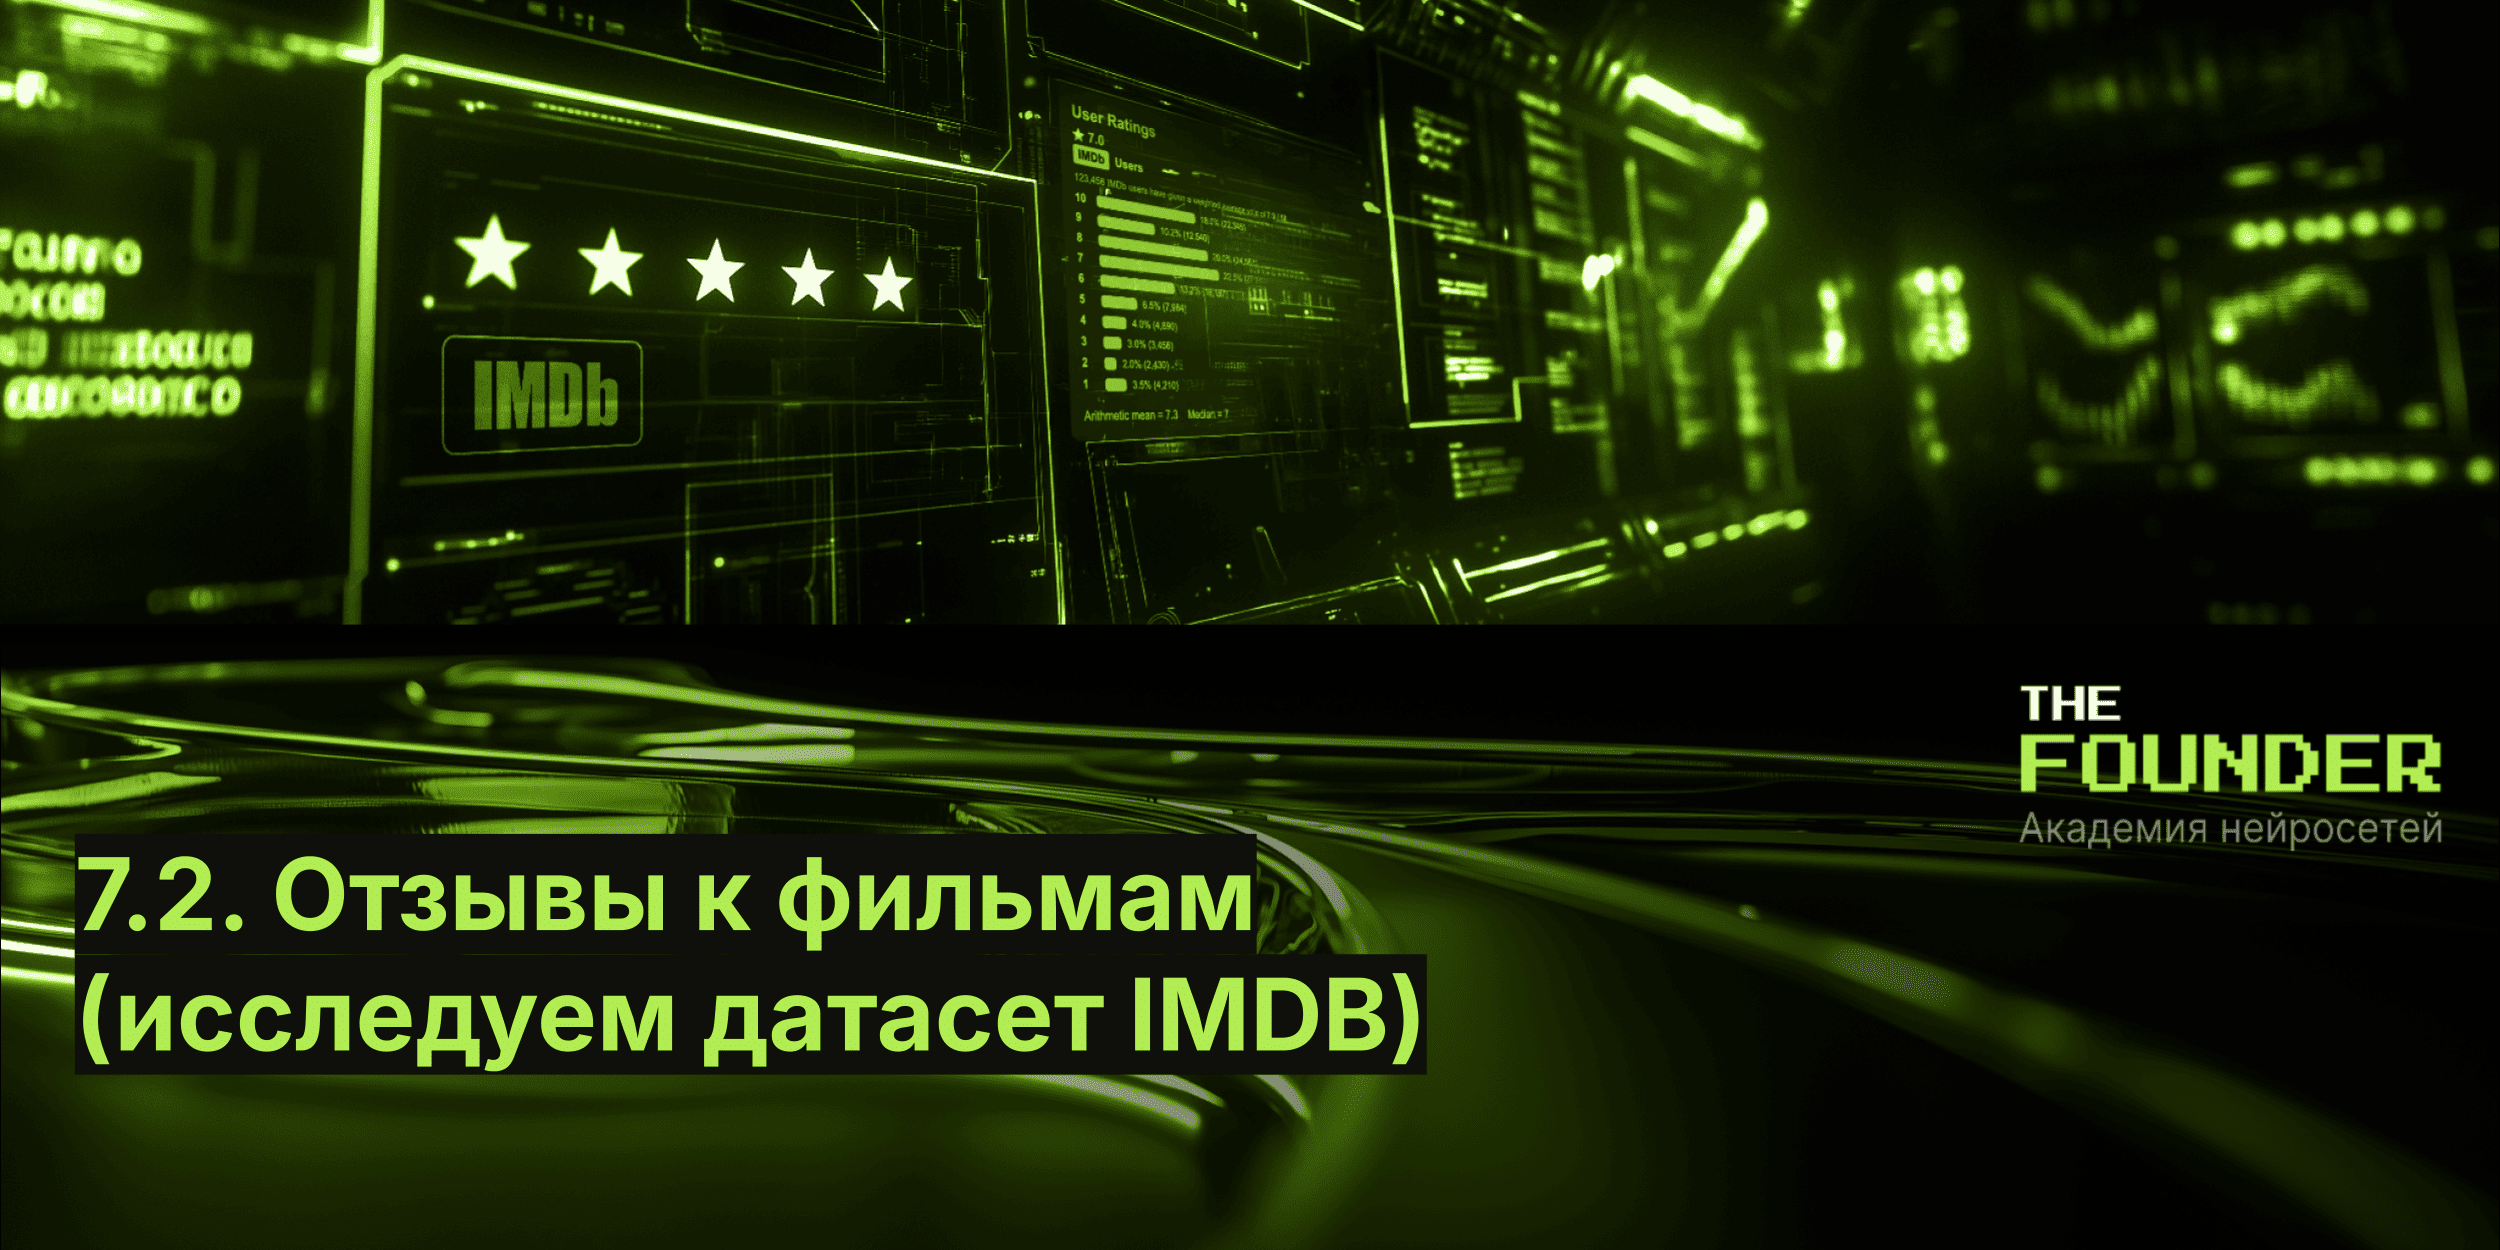

**Навигация по уроку**

1. [Библиотеки Python для Data Science](https://colab.research.google.com/drive/1VKRkuVNaSRPy6uNRhWLIlfaTnLPuyWcC)
2. Отзывы к фильмам (исследуем датасет IMDB)
3. [Домашняя работа](https://colab.research.google.com/drive/125zfINhN9fxIYA50MCph1Fqhh0LoSP0J)

На практической части урока мы продолжим погружение в невероятный мир Pandas.
В качестве обучающего датасета мы выбрали набор данных из 45000 фильмов, выпущенных в июле 2017 года или ранее. Данные включают актерский состав, съемочную группу, ключевые слова сюжета, бюджет, доходы, постеры, даты выхода, языки, производственные компании, страны, количество голосов на TMDB и средние значения голосов.

В этом наборе данных также есть файлы, содержащие 26 миллионов оценок от 270 000 пользователей для всех 45 000 фильмов. Оценки даны по шкале от 1 до 5 и были получены с официального веб-сайта GroupLens.

Этот набор данных состоит из следующих файлов:

* **movies_metadata.csv**. Основной файл метаданных фильмов. Содержит информацию о 45 000 фильмах, представленных в полном наборе данных MovieLens. Включает постеры, фоны, бюджет, доходы, даты выхода, языки, страны производства и компании.

* **keywords.csv**. Ключевые слова сюжета фильма. Доступно в виде строкового объекта JSON.

* **credits.csv**. Информация об актерах и съемочной группе для всех  фильмов. Доступно в виде строкового объекта JSON.

* **links.csv**. Содержит идентификаторы TMDB и IMDB фильмов.

* **links_small.csv**. Содержит идентификаторы TMDB и IMDB небольшого подмножества из 9000 фильмов.

* **ratings_small.csv**. Подмножество из 100 000 оценок от 700 пользователей по 9000 фильмам.

## Загрузка датасета

Работа с датасетом начинается со сбора данных, но если вам безумно повезло и вы знаете, где взять датасет, то его скорее всего сначала придется скачать в ту среду, с которой вы работаете, как минимум в рабочую директорию вашей программы. Чем больше размер датасета, тем более трудоемким может оказаться процесс по его скачиванию.

Скачивание файлов с сервера обычно выполняется с помощью метода GET. После выполнения запроса файл можно сохранить на диск:

In [ ]:
from requests import get
response = get("https://storage.yandexcloud.net/academy.ai/the_movies_dataset.zip")

In [ ]:
with open('the_movies_dataset.zip', 'wb') as f:
    f.write(response.content)


При скачивании файла важно использовать атрибут `content` ответа, так как он содержит бинарные данные ответа.

Но если вы работаете с большими файлами, напрямую сохранять `response.content` может быть неэффективно из-за потребления большого объема памяти. Вместо этого вы можно использовать стриминг:

In [ ]:
with open('the_movies_dataset.zip', 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)


Когда архив с датасетом загружен - его необходимо распаковать:

In [ ]:
# Разархивация датасета в директорию 'the_movies_dataset'
!unzip -qo "the_movies_dataset.zip" -d ./the_movies_dataset

# Папка с распакованным датасетом
FILE_PATH = './the_movies_dataset'

Теперь вы можете увидеть, что находится в загруженной базе. Для этого функцией `listdir()` из модуля os получите список папок по адресу **FilE_PATH**:

In [ ]:
# Для работы с файлами
import os

os.listdir(FILE_PATH)

['links_small.csv',
 'credits.csv',
 'movies_metadata.csv',
 'links.csv',
 'keywords.csv',
 'ratings.csv',
 'ratings_small.csv']

In [ ]:
# Отключим предупреждения Python, чтобы не захламлять лишним выводом наш Блокнот
import warnings
warnings.filterwarnings('ignore')

## Анализ датасета

Теперь когда датасет загружен и распакован, мы можем импортировать необходимые библиотеки и приступить к анализу данных:

In [ ]:
import pandas as pd
import numpy as np

Для начала создадим датафрейм из файла метаданных фильмов:

In [ ]:
df = pd.read_csv(f'{FILE_PATH}/movies_metadata.csv')
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Изучим его столбцы:

In [ ]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

Датасет содержит столбцы (они же серии):

* **adult**. Фильмы для взрослых. Указывает, является ли фильм с рейтингом X или для взрослых
* **belongs_to_collection**. Структурированный словарь, который предоставляет информацию о серии фильмов, к которому принадлежит конкретный фильм.
* **budget**. Бюджет фильма в долларах.
* **genres**. Структурированный список словарей, в которых перечислены все жанры, связанные с фильмом.
* **homepage**. Официальная домашняя страница фильма.
* **id**. Идентификатор фильма.
* **imdb_id**. Идентификатор IMDB фильма.
* **original_language**. Язык, на котором изначально был снят фильм.
* **original_title** Оригинальное название фильма.
* **overview**. Краткая аннотация к фильму.
* **popularity**. Показатель популярности, присвоенный TMDB.
* **poster_path**. URL-адрес изображения плаката.
* **production_companies**. Полный список производственных компаний, участвующих в создании фильма.
* **production_countries**. Полный список стран, в которых был снят/продюсирован фильм.
* **release_date**. Дата выхода фильма в прокат.
* **revenue**. Общая выручка фильма в долларах.
* **runtime**. Время показа фильма в минутах.
* **spoken_languages**. Строгий список языков, на которых говорят в фильме.
* **status**. Статус фильма (выпущен, будет выпущен, анонсирован и т.д.)
* **tagline**. Слоган фильма.
* **title**. Официальное название фильма.
* **video**. Указывает, присутствует ли видеозапись фильма в TMDB.
* **vote_average**. Средняя оценка фильма.
* **vote_count**. Количество голосов пользователей, подсчитанное TMDB.

Получим форму датасета:

In [ ]:
df.shape

(45466, 24)

И информацию о нем:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

Итак, о чем нам говорит эта информация?

В науке о данных важно уметь интерпретировать данные.

Анализируя данные мы видим, что в датасете насчитывается 45 466 фильмов с 24 характеристиками (сериями, столбцами). Большинство столбцов содержат некоторое количество значений NaN. Мы это видим по `Non-Null Count` (не пустые) колонке в отчете по данным метода `info()`.

Далее мы попытаемся привести этот набор данных к форме, подходящей для анализа.

## Очистка данных

Первым делом удалим из нашего датафрейма избыточные данные, которые нам не нужны:

In [ ]:
df = df.drop(['imdb_id'], axis=1)
df = df.drop(['adult'], axis=1)
df = df.drop(['belongs_to_collection'], axis=1)
df = df.drop(['homepage'], axis=1)
df = df.drop(['video'], axis=1)
df = df.drop(['poster_path'], axis=1)
df = df.drop(['production_companies'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45466 non-null  object 
 1   genres                45466 non-null  object 
 2   id                    45466 non-null  object 
 3   original_language     45455 non-null  object 
 4   original_title        45466 non-null  object 
 5   overview              44512 non-null  object 
 6   popularity            45461 non-null  object 
 7   production_countries  45463 non-null  object 
 8   release_date          45379 non-null  object 
 9   revenue               45460 non-null  float64
 10  runtime               45203 non-null  float64
 11  spoken_languages      45460 non-null  object 
 12  status                45379 non-null  object 
 13  tagline               20412 non-null  object 
 14  title                 45460 non-null  object 
 15  vote_average       

Допустим мы хотим проанализировать кассовые сборы фильма и нам важно, чтобы `revenue` содержал корректные данные.

In [ ]:
df[df['revenue'] == 0].shape

(38052, 17)

Мы видим, что у большинства фильмов кассовые сборы равны 0. Это указывает на то, что у нас нет информации об общем доходе от этих фильмов. Для нашего анализа - эти данные противоречивые, поэтому пометим их как NaN:

In [ ]:
df['revenue'] = df['revenue'].replace(0, np.nan)

Посмотрите внимательно на типы данных в столбцах `revenue` и `budget`:

In [ ]:
print("Тип столбца budget:", df.budget.dtypes)
print("Тип столбца revenue:", df.revenue.dtypes)

Тип столбца budget: object
Тип столбца revenue: float64


Видимо столбец `budget` имеет некоторые нечеткие значения, из-за чего Pandas определяет его как универсальный объект. В то время как `revenue` определяется как `float64`, в целом мы так и ожидали.

Чтобы столбец `budget` определялся как числовой, необходимо заменить все нечисловые значения на NaN, а также преобразовать все нулевые значения в NaN, тем самым указываем на отсутствие информации о бюджете по этим фильмам.

In [ ]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce') # Пытаемся преобразовать в число, в случае ошибки принуждаем (coerce) к NaN
df['budget'] = df['budget'].replace(0, np.nan) # Заменяем 0 на NaN
df[df['budget'].isnull()].shape # Получаем только записи с numpy.NaN или Python None

(36576, 17)

Нам, как исследователям данных, придётся постоянно создавать новые столбцы, и использовать их для агрегированных данных, промежуточных расчётов, целевых функций, осей графиков и других целей.

Например, мы хотим получить год выпуска фильма. Для этого мы создадим новый столбец `year` и поместим в него результат преобразования столбца `realease_date`:

In [ ]:
# Пытаемся преобразовать строку вида 1995-10-30 к 1995
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
df[['title', 'year']].head() # Выводим название фильма и год выпуска

,title,year
0,Toy Story,1995
1,Jumanji,1995
2,Grumpier Old Men,1995
3,Waiting to Exhale,1995
4,Father of the Bride Part II,1995


Разберёмся, что за сложные преобразования мы совершили.

Во-первых, мы взяли столбец `release_date`, который содержит строки вида 1995-10-30 и преобразовали его к формату datetime. Всем данным, которые мы не смогли преобразовать, мы присваиваем значение NaN.

Если бы мы не передали аргумент `errors` равный `coerce`, то получили бы ошибку выполнения. `Сoerce` дословно переводится как `принуждение`, т.е. мы принудительно в случае ошибки присваиваем значение NaN.

Ранее мы познакомились с методом apply() и lambda-функцией. На втором этапе, мы применили их для преобразования `1995-10-30` в строку `1995`.

В lambda-функции мы используем упрощенный формат записи if-else в одну  строку:
```
<переменная> = <выражение> if <условие> else <выражение иначе>
```

Также мы использовали метод split(), чтобы разделить строку на список по разделителю (метод без параметра разобьёт строку по пробелам, мы же указываем в качестве параметра `-`). В результате нулевой элемент списка содержит год, первый - месяц, а второй день. Нас интересует только нулевой. Именно его мы и присваиваем новой колонке `year`.

Далее создадим столбец `return` для расчета финансового показателя ROI ("возврат на инвестиции").

In [ ]:
df['return'] = df['revenue'] /  df['budget'] * 100 # Будем считать по классике в процентах, как велит финансовый менеджмент
df[df['return'].notnull()].shape # notnull() - возвращает булеву маску, False - если NaN или None, иначе True

(5381, 19)

У нас есть около 5000 фильмов, по которым у нас есть данные о соотношении сборов и бюджета. Это близко к 10% от всего набора данных.  Хотелось бы большего, но будем довольствоваться тем, что имеется. Этого вполне достаточно для проведения очень полезного анализа и получения интересных сведений о мире кино.


## Проверка гипотез

Когда данные очищены и созданы вспомогательные столбцы, то можно переходить к проверке гипотез. Любой анализ данных должен начинаться с гипотез. Вы выдвигаете гипотезу относительно исследуемых данных и после ее подтвержаете или опровергаете на основании статических методов, теории вероятности, математических расчетов, ну и конечно же, визуализации.

На следующем уроке, мы с вами подробно изучим библиотеки визуализации в DataScience, сейчас можете сильно на них не акцентировать внимание, а просто получать удовольствие от анализа данных и подтверждения гипотез с помощью графиков.

### Гипотеза 1. Название фильмов

Гипотезы могут быть любыми. Например, у нас есть предположение, что для некоторых фильмов оригинальное название и название, которое фильму присвоено в международном прокате будут отличаться. Это логично, но при работе с даннымы все гипотезы необходимо проверять:

In [ ]:
df[df['original_title'] != df['title']][['id', 'title', 'original_title']].head()

,id,title,original_title
28,902,The City of Lost Children,La Cité des Enfants Perdus
29,37557,Shanghai Triad,摇啊摇，摇到外婆桥
32,78802,Wings of Courage,"Guillaumet, les ailes du courage"
57,11010,The Postman,Il postino
58,99040,The Confessional,Le confessionnal


### Гипотеза 2. Возврат инвестиций и продолжительность фильма

Следующая гипотеза, которую мы проверим: Влияет ли продолжительность фильма на "возврат инвестиций"

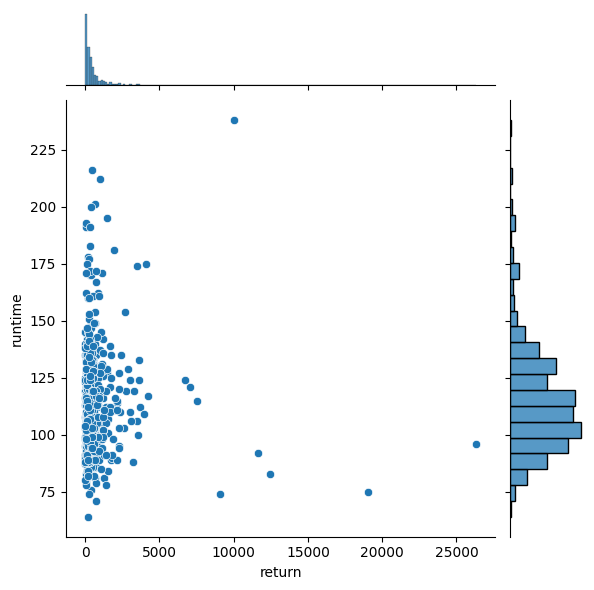

In [ ]:
# Без этой магической команды графики не отобразятся в ячейке Блокнота
%matplotlib inline
import matplotlib.pyplot as plt # Библиотека для построения графиков
import seaborn as sns # Еще одна библиотека для построения графиков, работает как обертка над предыдущей

df_mat = df[(df['return'].notnull()) & (df['runtime'] > 0)]
sns.jointplot(x='return', y='runtime', data=df_mat[:500], kind='scatter') # график совместного распределения по двум переменным
plt.show() # Показать построенный график

Функция jointplot() строит график совместного распределение по двум переменным. Функция имеет множество параметров, но для наших целей достаточно 5 параметр ов: data - набор данных для построения, x - имя столбца для данных по оси Х, y - имя для столбца для данных по оси Y, hue - имя столбца для отображения на графике 3-го измерения цветом и kind - как отображать данные (scatter - в виде диаграммы рассеивания, hist - бивариантной гистограммы, hex - шестигранников, а также доступны  другие варианты: resid, kde, reg).

По графику выше, можно  сделать заключение, что продолжительность фильма влияет на возврат инвестиций. Но это не совсем верное заключение. Зависимость возникает от того, что большинство фильмов имеют продолжительность 90 минут:

<Axes: ylabel='Frequency'>

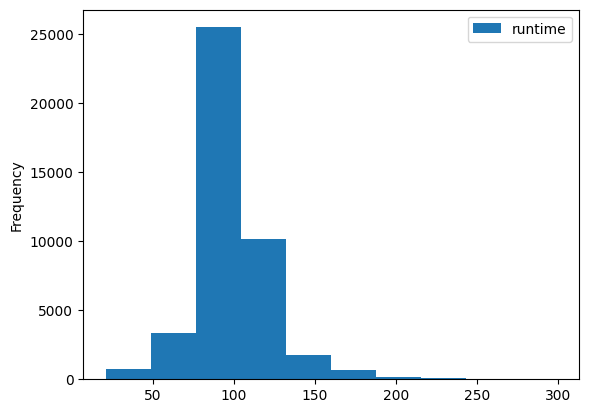

In [ ]:
# Отсекаем выбросы, которые мало влияют на результат, используем только диапазон (20, 300)
# метод plot() - строит по колонке заданный тип графика (kind), hist - значит гистограмма
df[(df['runtime']>20) & (df['runtime']<300)][['runtime']].plot(kind='hist')

### Гипотеза 3. Связь между кассовым сбором, бюджетом и оценкой фильма

Другая гипотеза, которую мы выдвинем и проверим, кажется более логичной. А что если имеется закономерность между бюджетом фильма, его кассовыми сборами и средней оценкой фильма зрителями? Вполне логично. Чем больше бюджет у фильма, тем более знаменитых кинозвёзд можно позвать в фильм, тем выше оценка зрителей и больше людей придёт на просмотр в кино. А значит и вырастут кассовые сборы. Но важно не перестараться с бюджетом, а то возврат инвестиций будет небольшим.

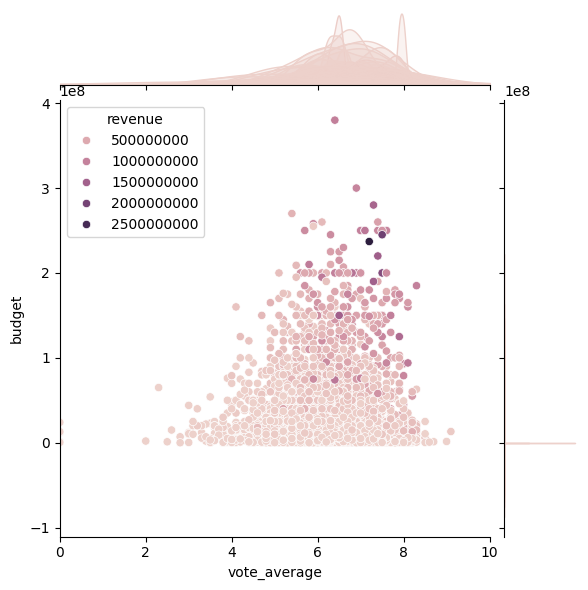

In [ ]:

df_mat = df[(df['budget']>0) & (df['revenue']>0)]
sns.jointplot(x='vote_average', y='budget', hue='revenue', data=df_mat[:5000], kind='scatter') # график совместного распределения по двум переменным
plt.xlim(0, 10) # Ограничим ось Х диапазоном (0, 10)
plt.show() # Показать построенный график

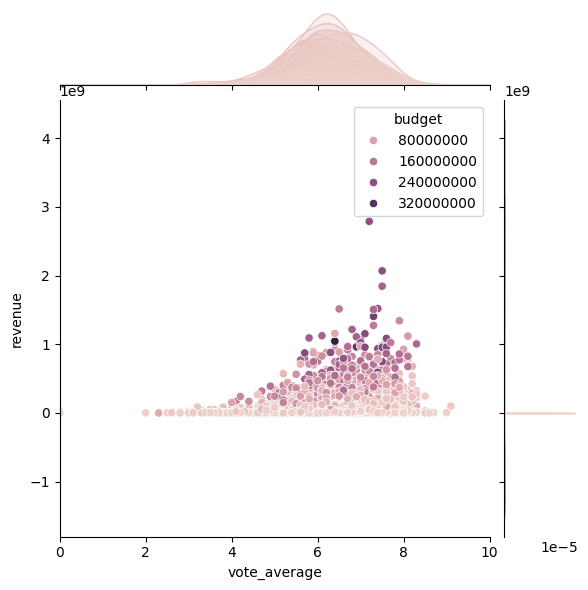

In [ ]:
df_mat = df[(df['budget']>0) & (df['revenue']>0)]
sns.jointplot(x='vote_average', y='revenue', hue='budget', data=df_mat[:5000], kind='scatter') # график совместного распределения по двум переменным
plt.xlim(0, 10) # Ограничим ось Х диапазоном (0, 10)
plt.show() # Показать построенный график

Графики показывают, что фильмы с максимальными бюджетами оцениваются зрителем в 5-8 баллов из 10. А вот зависимость между кассовыми сборами и оценками зрителей, явно смещена в правую сторону. Чем выше оценка, тем больше сборы. Максимальные кассовые сборы получили фильмы с оценкой 7. Причем заметна закономерность: при оценке фильма 5-8, высокие бюджеты увеличивают сборы.

Отсортируем фильмы по "возврату инвестиций" и получим топ-10 самых прибыльных фильмов:

In [ ]:
df[['title', 'return', 'revenue', 'budget', 'year', 'vote_average']].sort_values('return', ascending=False).head(10)

,title,return,revenue,budget,year,vote_average
4000,Less Than Zero,1.239638e+09,12396383.0,1.0,1987,6.1
3342,Modern Times,8.500000e+08,8500000.0,1.0,1936,8.1
14372,Welcome to Dongmakgol,4.197477e+08,33579813.0,8.0,2005,7.7
22278,Aquí Entre Nos,2.755584e+08,2755584.0,1.0,2012,6.0
2308,"The Karate Kid, Part II",1.018619e+08,115103979.0,113.0,1986,5.9
25989,Nurse 3-D,1.000000e+08,10000000.0,10.0,2013,4.9
16664,From Prada to Nada,2.688172e+06,2500000.0,93.0,2011,5.0
14192,Paranormal Activity,1.289039e+06,193355800.0,15000.0,2007,5.9
8211,Tarnation,5.330339e+05,1162014.0,218.0,2003,7.5
2595,The Blair Witch Project,4.133333e+05,248000000.0,60000.0,1999,6.3


Гипотезы надо выдвигать и проверять самые неожиданные. Из топ-10 фильмов по возврату инвестиций, самым прибыльным оказался фильм "Less Than Zero" с бюджетом 1 доллар, собравший более 12 млн. долларов. И самое удивительно, что в топ-10 попали 5 фильмов с бюджетом менее 10 долларов.

Мы использовали метод `sort_values` для сортировки датафрейма:
```
sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None),
```
где
* **by** – определяет список столбцов для сортировки (значение или список значений)
* **ascending** – задает порядок сортировки (значение или список значений). Чтобы задать порядок «по убыванию», следует указать ascending=False
* **kind** – позволяет выбрать алгоритм сортировки (quicksort - быстрая сортировка, mergesort - сортировка слиянием, или heapsort - пирамидальная сортировка). По умолчанию используется алгоритм quicksort
* **inplace** - применять ли сортировку к исходным данным по умолчанию отключена
* **key** - применить любую функцию к данным еще до операции сортировки. Вместо функции также может быть lambda-функция
* **sort_index** - сортирует датафрейм по индексам строк
* **axis** - ось для сортировки
* **ignore_index** - игнорировать индекс, если True - результирующая ось будет помечена как 0, 1, 2 .. n-1
* **na_position** - куда помещаем NaN, в начало списка ('first') или в конец ('last')

В мире киноиндустрии считается, что оптимальный бюджет для кассового фильма должен составлять около 5 млн. долларов. Получим топ-10 самых окупаемых фильмов (по ROI) с бюджетом более 5 млн. долларов:

In [ ]:
df[df['budget'] > 5e6][['title', 'return', 'revenue', 'budget', 'year', 'vote_average']].sort_values('return', ascending=False).head(10)

,title,return,revenue,budget,year,vote_average
1065,E.T. the Extra-Terrestrial,7552.050724,792965326.0,10500000.0,1982,7.3
256,Star Wars,7049.072791,775398007.0,11000000.0,1977,8.1
1338,Jaws,6723.628571,470654000.0,7000000.0,1975,7.5
1888,The Exorcist,5516.326813,441306145.0,8000000.0,1973,7.5
352,Four Weddings and a Funeral,4245.013867,254700832.0,6000000.0,1994,6.6
834,The Godfather,4084.440183,245066411.0,6000000.0,1972,8.5
4492,Look Who's Talking,3946.666667,296000000.0,7500000.0,1989,5.8
24258,Annabelle,3927.289431,255273813.0,6500000.0,2014,5.5
1056,Dirty Dancing,3565.904567,213954274.0,6000000.0,1987,7.1
1006,The Sound of Music,3490.418122,286214286.0,8200000.0,1965,7.4


А теперь получим топ-10 самых кассовых фильмов, без привязки к бюджету:

In [ ]:
df[['title', 'return', 'revenue', 'budget', 'year', 'vote_average']].sort_values('revenue', ascending=False).head(10)

,title,return,revenue,budget,year,vote_average
14551,Avatar,1176.356577,2.787965e+09,237000000.0,2009,7.2
26555,Star Wars: The Force Awakens,844.172908,2.068224e+09,245000000.0,2015,7.5
1639,Titanic,922.517094,1.845034e+09,200000000.0,1997,7.5
17818,The Avengers,690.708141,1.519558e+09,220000000.0,2012,7.4
25084,Jurassic World,1009.019207,1.513529e+09,150000000.0,2015,6.5
28830,Furious 7,792.762821,1.506249e+09,190000000.0,2015,7.3
26558,Avengers: Age of Ultron,501.929891,1.405404e+09,280000000.0,2015,7.3
17437,Harry Potter and the Deathly Hallows: Part 2,1073.600000,1.342000e+09,125000000.0,2011,7.9
22110,Frozen,849.479339,1.274219e+09,150000000.0,2013,7.3
42222,Beauty and the Beast,789.303961,1.262886e+09,160000000.0,2017,6.8


Кассовые фильмы обеспечивают возврат на инвестиции примерно от 500% до 1000%. И это очень хороший результат. Не удивительно, что в этой категории так много знакомых названий.

А это топ-10 аутсайдеров с бюджетом более 5 млн. долларов и минимальным возвратом на инвестиции:

In [ ]:
df[(df['budget']>5e6) & (df['status']=='Released')][['title', 'return', 'revenue', 'budget', 'year', 'vote_average']].sort_values('return', ascending=True).head(10)

,title,return,revenue,budget,year,vote_average
7016,Chasing Liberty,0.000052,12.0,23000000.0,2004,6.1
8107,The Cookout,0.000075,12.0,16000000.0,2004,4.6
2663,Never Talk to Strangers,0.000094,6.0,6400000.0,1995,4.7
17527,Deadfall,0.000180,18.0,10000000.0,1993,3.1
6736,In the Cut,0.000192,23.0,12000000.0,2003,4.7
11918,Death at a Funeral,0.000511,46.0,9000000.0,2007,6.9
20214,The Samaritan,0.021008,2521.0,12000000.0,2012,5.2
24295,The Adventurer: The Curse of the Midas Box,0.025596,6399.0,25000000.0,2013,5.1
43206,Aftermath,0.032867,3451.0,10500000.0,2017,5.8
41855,The Guillotines,0.035267,5290.0,15000000.0,2012,5.4


### Гипотеза 4. Больше всего выпускается англоязычных фильмов

Определим на скольких языках представлены фильмы в датасете:

In [ ]:
df['original_language'].drop_duplicates().shape[0] # drop_duplicates() - удаляет повторения в данных

93

Чтобы подсчитать количество фильмов для каждого языка воспользуемся методом `value_counts()`. Он используется для получения Series, содержащего уникальные значения. Метод вернет результат, отсортированный в порядке убывания, так что первый элемент в коллекции будет самым встречаемым. NaN-значения не будут включены в результат.

Метод `value_counts()` может быть вызван и с параметрами:
* **normalize** (bool, по умолчанию False) — если True, то возвращаемый объект будет содержать значения относительно частоты встречаемых значений.
* **sort** (bool, по умолчанию True) — сортировка по частоте.
* **ascending** (bool, по умолчанию False) — сортировка по возрастанию.
* **bin**s (int) — вместе подсчета значений группирует их по отрезкам, но это работает только с числовыми данными.
* **dropna** (bool, по умолчанию True) — не включать результаты с NaN.

In [ ]:
lang_df = pd.DataFrame(df['original_language'].value_counts()) # создадим датафрейм из языков и частоты употребления
lang_df.head()

,count
original_language,
en,32269
fr,2438
it,1529
ja,1350
de,1080


Создадим колонку из индекса и переименуем колонки. Строить график удобнее по колонке, чем по индеку:

In [ ]:
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
original_language,,
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


Все языки мы выводить не будем на график и ограничимся только 10 самыми популярными:

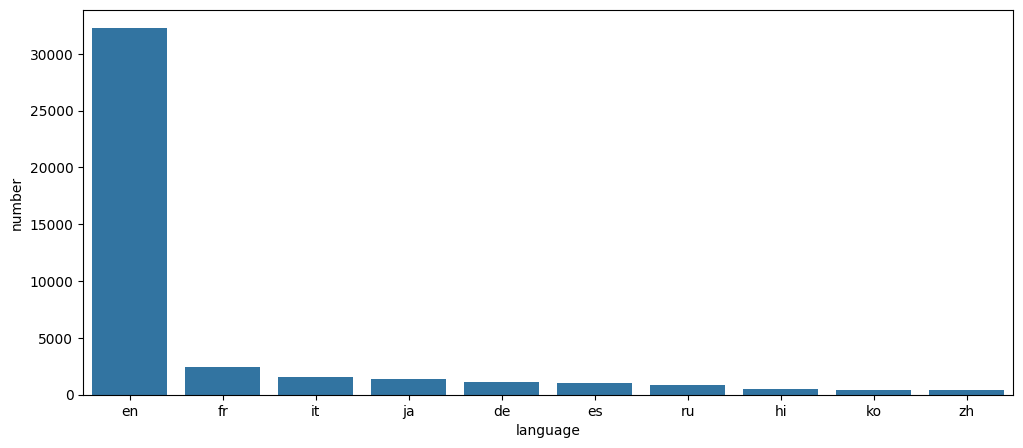

In [ ]:
plt.figure(figsize=(12,5)) # Задаем в дюймах область рисования графика (ширина, высота)
sns.barplot(x='language', y='number', data=lang_df.iloc[0:10]) # рисуем столбчатый график (категория - значение)
plt.show()

### Гипотеза 5. Больше всего фильмов выпускают под новый год

Даты выхода фильма зачастую играет очень важную роль в определении успеха и дохода, получаемого от конкретного фильма. Под новый год растут продажи в торговых сетях, люди закупаются подарками, у всех праздничное настроение. Проверим гипотезу насчет кассовых сборов на новогодних праздниках. Важно понимать, что новый год в разных странах празднуется по разному, разные традиции. Но раз большинство фильмов англоязычные, а это по большей части католические и протестанские страны, то в канун рождества принято проводить с семьей, а не в кинотеатрах, активная рабочая неделя уже с 3-4 января, но новогоднее настроение сохраняется до конца января. Поэтому логично предположить, что январь наиболее подходящий период для киноиндустрии, что бы подогревать атмосферу праздника для своего зрителя и заработать на этом.

<Axes: title={'center': 'Число фильмов по месяцам'}, xlabel='month', ylabel='count'>

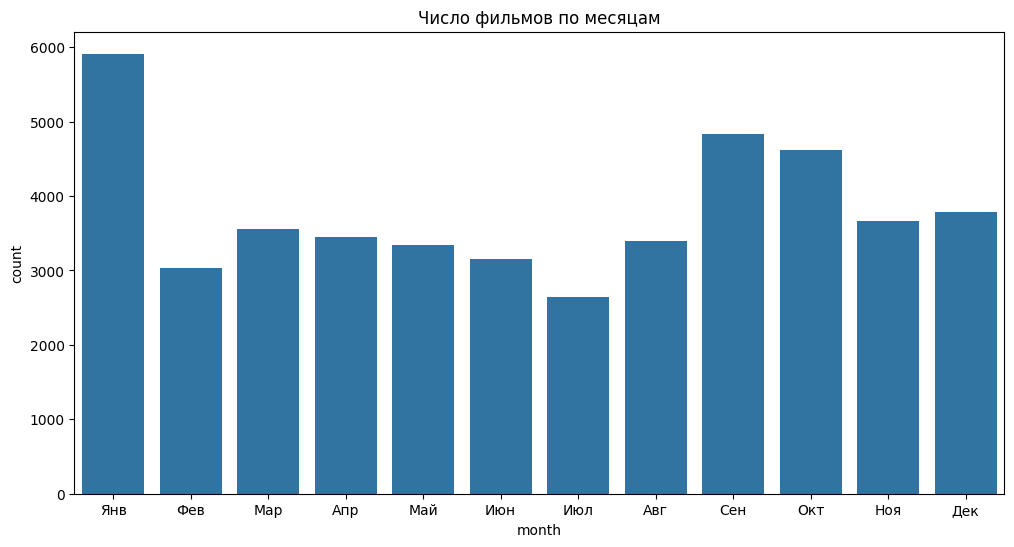

In [ ]:
month_order = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'] # Создадим список месяцев
# Определим функцию преобразования даты релиза в месяц
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

df['month'] = df['release_date'].apply(get_month)  # Применим функцию к столбцу

plt.figure(figsize=(12,6))
plt.title("Число фильмов по месяцам")
sns.countplot(x='month', data=df, order=month_order) # Аналогично barplot - выводит число значений для каждой категории

## Гипотеза 7. Кассовые сборы зависят от режиссера

Для ответа на этот вопрос нам придется использовать второй датасет:

In [ ]:
credits_df = pd.read_csv('./the_movies_dataset/credits.csv')
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


Набор данных Credits:
* **cast**. Структурированный список словарей, состоящий из имен актеров и соответствующих персонажей, которых они играли.
* **crew**. Структурированный список словарей, состоящий из имен членов команды и выполняемой ими функции.
* **id**. Идентификатор TMDB фильма.

Нам нужно выполнить соединение датафрейма метаданных фильмов (`movies_metadata`) с датафреймом `credits`. Объединяем по полю id (идентификаторе фильма IMDB).

Прежде чем мы сможем выполнить это объединение, нам нужно убедиться, что столбец ID нашего основного фрейма данных является "чистым" и имеет тип int.

Для этого давайте попробуем выполнить целочисленное преобразование наших идентификаторов, и если возникнет исключение, мы заменим идентификатор на NaN. Затем удалим эти строки из нашего датафрейма.

In [ ]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

df['id'] = df['id'].apply(convert_int)  # Преобразуем к int

Для удаления записей, содержащих NaN, необходимо использовать метод drop, который работает не с маской, а со списком индексов. Поэтому обращаясь к индексу (index) отобранных по маске записей, мы получим список ID, его и удалим:  

In [ ]:
df = df.drop(df[df['id'].isnull()].index)

In [ ]:
df['id'] = df['id'].astype('int') # установим тип

Используя метод merge, объединяем датафреймы `df` и `credits_df` по общему полю `id` (параметр `on`):

In [ ]:
df_merge = df.merge(credits_df, on='id')
df_merge.shape

(45538, 22)

In [ ]:
import ast
df_merge['crew'] = df_merge['crew'].apply(ast.literal_eval) # Строку в словарь '{"a": 1}' -> {'a': 1}

Мы используем здесь библиотеку, которая преобразует строку в словарь.

In [ ]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

df_merge['director'] = df_merge['crew'].apply(get_director)

Посмотрим на структуру df_merge:

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45538 entries, 0 to 45537
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                8912 non-null   float64
 1   genres                45538 non-null  object 
 2   id                    45538 non-null  int64  
 3   original_language     45527 non-null  object 
 4   original_title        45538 non-null  object 
 5   overview              44584 non-null  object 
 6   popularity            45535 non-null  object 
 7   production_countries  45535 non-null  object 
 8   release_date          45451 non-null  object 
 9   revenue               7428 non-null   float64
 10  runtime               45278 non-null  float64
 11  spoken_languages      45535 non-null  object 
 12  status                45454 non-null  object 
 13  tagline               20439 non-null  object 
 14  title                 45535 non-null  object 
 15  vote_average       

Оставим только наиболее информативные и интересные для нас колонки:

In [ ]:
df_merge = df_merge[['director', 'revenue', 'return', 'budget',	'runtime',	'vote_average',	'vote_count']]

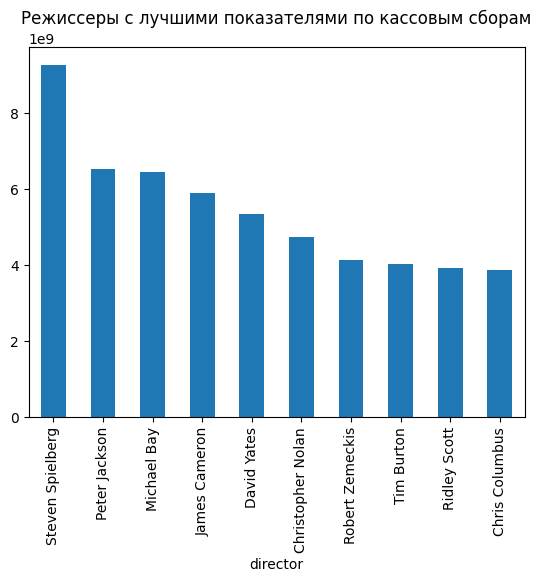

In [ ]:
plt.title('Режиссеры с лучшими показателями по кассовым сборам')
df_merge.groupby('director').sum().sort_values('revenue', ascending=False)['revenue'].head(10).plot(kind='bar')
plt.show()

Выше мы получили, как это принято называть, агрегированные данные. Мы сначала сгруппировали данные по полю (столбцу) `director`, а после вычислили сумму по каждой группе. Рассмотрим весь процесс по шагам.

Чтобы выполнить агрегированные расчеты на основе данных, нужно сначала
распределить данные по соответствующим группам. Встроенная в pandas функция `groupby()` разбивает данные датафрейма на подмножества, которые имеют
совпадающие значения в одном или нескольких столбцах. В нашем случае для
группировки датафрейма `df_merge` по режиссеру можно использовать
groupby(). Затем мы применяем агрегатную функцию pandas sum(), к каждому числовому столбцу датафрейма внутри группы. Можно группировать не одну группу, а список групп.

In [ ]:
df_test = df_merge.groupby('director').sum().sort_values('revenue', ascending=False) # Отсортируем по кассовым сборам
df_test.head()

,revenue,return,budget,runtime,vote_average,vote_count
director,,,,,,
Steven Spielberg,9.256621e+09,30999.808649,1.736950e+09,4276.0,227.5,62266.0
Peter Jackson,6.528245e+09,5050.507880,1.326776e+09,1853.0,92.8,47571.0
Michael Bay,6.437467e+09,5089.889330,1.670000e+09,1907.0,83.1,28767.0
James Cameron,5.900610e+09,5423.441585,7.600458e+08,1253.0,76.2,33794.0
David Yates,5.334563e+09,3102.206403,1.135000e+09,1293.0,60.3,31056.0


Как мы видим выше, суммировались все числовые колонки (budget, revenue, runtime, vote_average,	vote_count,	return) по каждому режиссеру. Теперь мы можем строить графики по агрегированным данным.

Например, на сколько минут наснимали фильмов самые "доходные" режиссеры

<Axes: xlabel='director'>

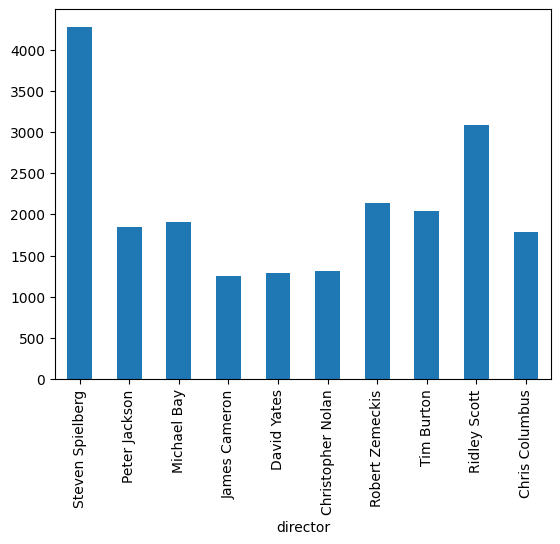

In [ ]:
df_test['runtime'].head(10).plot(kind='bar')

На этом практическая часть урока завершена. Пора переходить к [домашей работе](https://colab.research.google.com/drive/125zfINhN9fxIYA50MCph1Fqhh0LoSP0J).